In [35]:
## Import necessary functions
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold, train_test_split, GridSearchCV, cross_val_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
%matplotlib inline

In [37]:
#read/load csv file and seperate data into respective columns based on (;)
wine_data = pd.read_csv('winequality-red.csv.xls', sep = ';')
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [38]:
#display the first 5 rows of the red wine quality dataset
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [39]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [40]:
#display the count of the red wine quality to see the actual count
wine_data.quality.value_counts()
# we have 6 kind of quality scores and most of them are 5 and 6

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [41]:
#checking how many rows and columns in the dataset 
wine_data.shape

(1599, 12)

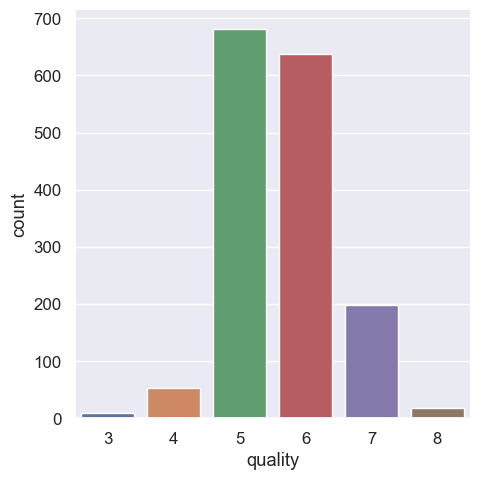

In [42]:
#display the count of the red wine quality in an estimation plot
sns.catplot(x ='quality',data = wine_data, kind = 'count')

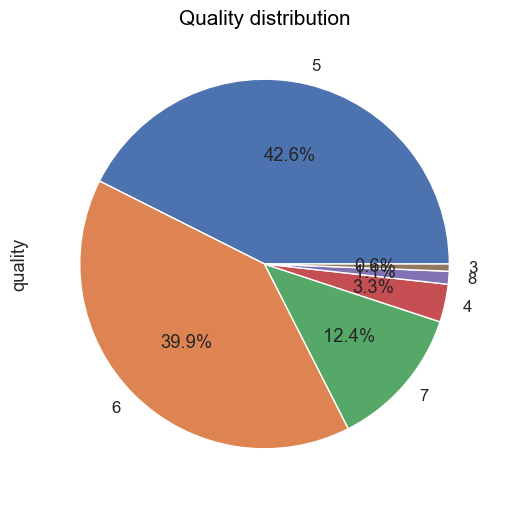

In [43]:
#display red wine quality distribution
plt.figure(1, figsize = (10,6))
plt.title("Quality distribution", color = "black", fontsize = 15)
wine_data["quality"].value_counts().plot.pie(autopct = "%1.1f%%");

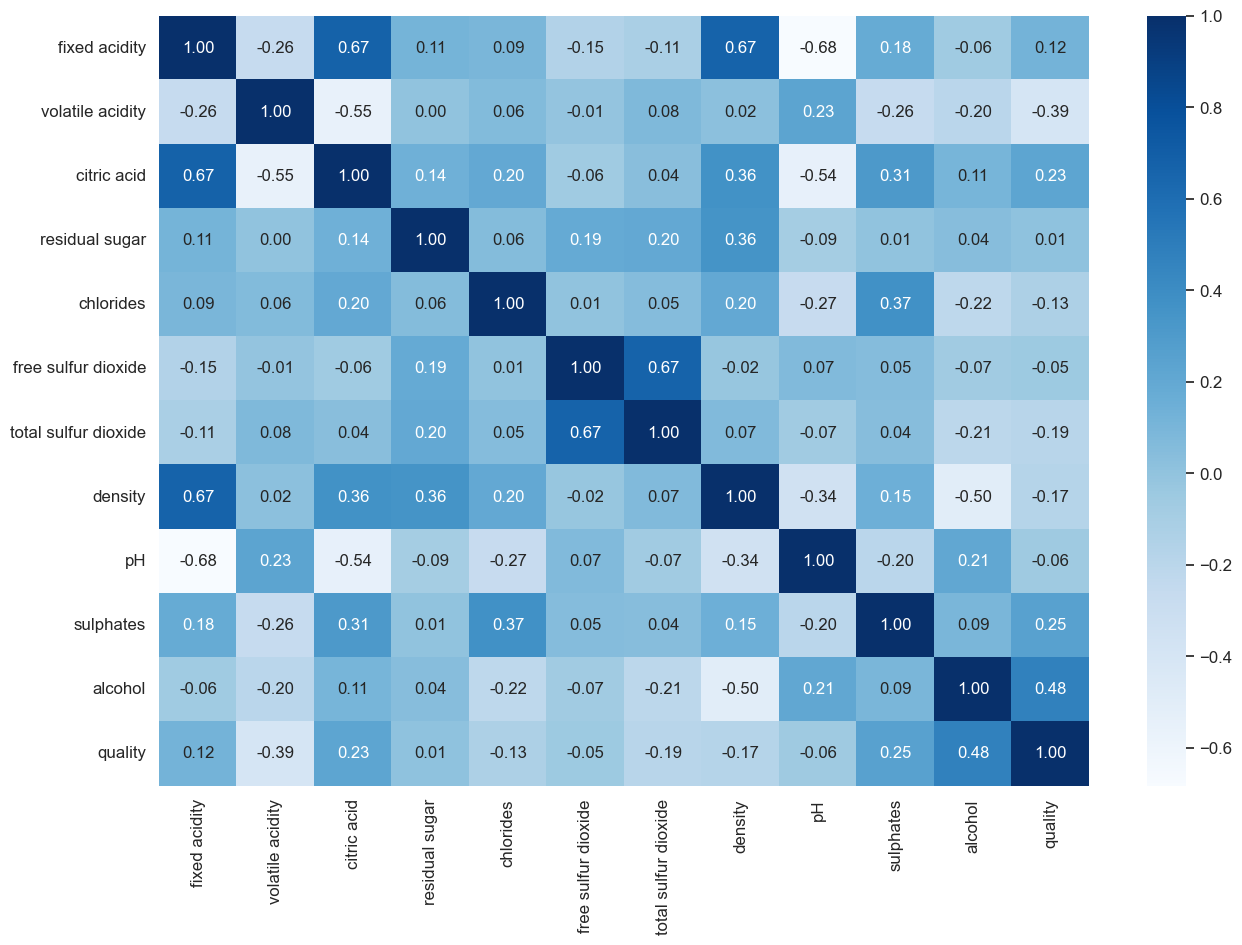

In [44]:
#plotting Figure Size
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.1)
#generate Heat Map, allow annotations and place floats in map
sns.heatmap(wine_data.corr() , cmap = "Blues", annot = True, fmt = ".2f", annot_kws = {"size": 12});

In [45]:
#grouping the wine quality into good or bad based on their quality
wine_data["quality remark"] = ["good" if i>=6 else "bad" for i in wine_data["quality"]]
wine_data.head(20)
#lesser than 7 is bad , 7 and greater than is good

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality remark
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,bad
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,bad
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,good
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,good
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,bad


In [46]:
#using Label encoder, transforming catagorical features to numerical features.
label_quality = LabelEncoder()

In [47]:
#now changing the dataframe to reflect new label
wine_data['quality'] = label_quality.fit_transform(wine_data['quality'])

In [48]:
#setting the dependent and independent variables
X = wine_data[wine_data.columns[:-1]]
y = wine_data["quality"]

In [49]:
features = wine_data.drop(['quality', 'quality remark'], axis=1)
target = wine_data['quality remark']
 
#spliting dataset into training set and test set to cross-validate the models and determine their effectiveness.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=40)
X_train.shape, X_test.shape
#split data into 80:20 ratio for model selection

((1279, 11), (320, 11))

In [50]:
#checking how many good and bad white wine there are
target.value_counts()

good    855
bad     744
Name: quality remark, dtype: int64

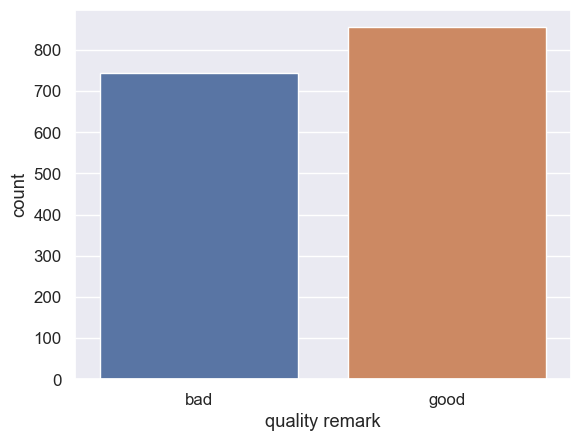

In [51]:
#plotting graph to visualize the count of the quality remark
sns.countplot(x=wine_data["quality remark"])
plt.show()

In [52]:
#normalise the features to use zero mean normalisation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_st = sc.fit_transform(X)
print(X_st[:5])

[[-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611 -0.78782264]
 [-0.29854743  1.96744245 -1.39147228  0.04341614  0.2238752   0.87263823
   0.62436323  0.02826077 -0.7199333   0.1289504  -0.58477711 -0.78782264]
 [-0.29854743  1.29706527 -1.18607043 -0.16942723  0.09635286 -0.08366945
   0.22904665  0.13426351 -0.33117661 -0.04808883 -0.58477711 -0.78782264]
 [ 1.65485608 -1.38444349  1.4841536  -0.45321841 -0.26496041  0.10759209
   0.41150046  0.6642772  -0.97910442 -0.46118037 -0.58477711  0.45084835]
 [-0.52835961  0.96187667 -1.39147228 -0.45321841 -0.24370669 -0.46619252
  -0.37913269  0.55827446  1.28864292 -0.57920652 -0.96024611 -0.78782264]]


In [53]:
## Logistic Regression

logistic_regression = LogisticRegression(solver = "liblinear")
logistic_regression_model = logistic_regression.fit(X_train,y_train)
y_pred_logistic_regression = logistic_regression_model.predict(X_test)

print(classification_report(y_test , y_pred_logistic_regression))
print("Accuracy Score:",accuracy_score(y_pred_logistic_regression,y_test))

#Confusion Matrix of Logistic Regression
score = round(accuracy_score(y_test, y_pred_logistic_regression), 6)
cm = confusion_matrix(y_test, y_pred_logistic_regression)
print(cm)

#K-fold cross validation
n_folds = 5
clf_cv = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto')
cv_error = (cross_val_score(clf_cv, X, y, cv=n_folds))
print(cv_error)

              precision    recall  f1-score   support

         bad       0.76      0.76      0.76       147
        good       0.79      0.79      0.79       173

    accuracy                           0.78       320
   macro avg       0.77      0.77      0.77       320
weighted avg       0.78      0.78      0.78       320

Accuracy Score: 0.775
[[111  36]
 [ 36 137]]
[0.684375   0.684375   0.734375   0.66875    0.69278997]


In [54]:
## Support Vector Machine

svc_model = SVC(C=1, kernel='rbf')
svc_model.fit(X_train, y_train)
svc_y_pred = svc_model.predict(X_test)

#Showing results with Confusion Matrix
cm = confusion_matrix(y_test, svc_y_pred)
# sns.heatmap(cm, annot = True, fmt = ".0f")
# plt.xlabel("Predicted Values")
# plt.ylabel("Actual Values")
# plt.show()
print(cm)

#Summarize classification report
print('Classification Report:\n', classification_report(y_test, svc_y_pred))
print('Accuracy Score:', accuracy_score(y_test, svc_y_pred))

[[118  29]
 [ 39 134]]
Classification Report:
               precision    recall  f1-score   support

         bad       0.75      0.80      0.78       147
        good       0.82      0.77      0.80       173

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

Accuracy Score: 0.7875


In [55]:
#Parameter Tuning for Support Vector Machine

svc_param_grid = {'C':[0.01, 0.1, 1, 10, 100],
                'kernel': ['linear', 'rbf'],
                'gamma' :[0.001, 0.01, 0.1, 1, 10]}

#Define Grid Search
svc_cv = KFold(n_splits=5)
svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=svc_cv, scoring='accuracy')
svc_grid.fit(X_train, y_train)

#Summarize results
print('SVM best Params:', svc_grid.best_params_)
print('SVM best Score:', svc_grid.best_score_)

KeyboardInterrupt: 

In [23]:
svc_model = SVC(C = 100, gamma = 0.01, kernel='rbf')
svc_model.fit(X_train, y_train)

svc_y_pred = svc_model.predict(X_test)
print('Accuracy Score:', accuracy_score(y_test, svc_y_pred))

#Showing results with Confusion Matrix after hyperparameter tuning
cm = confusion_matrix(y_test, svc_y_pred)
# sns.heatmap(cm, annot = True, fmt = ".0f")
# plt.xlabel("Predicted Values")
# plt.ylabel("Actual Values")
# plt.show()
print(cm)

cv_error = (cross_val_score(clf_cv, X, y, cv=n_folds))
print(cv_error)

#Summarize classification report after hyperparameter tuning
print('Classification Report:\n', classification_report(y_test, svc_y_pred))

Accuracy Score: 0.765625
[[110  37]
 [ 38 135]]
[0.684375   0.684375   0.734375   0.66875    0.69278997]
Classification Report:
               precision    recall  f1-score   support

         bad       0.74      0.75      0.75       147
        good       0.78      0.78      0.78       173

    accuracy                           0.77       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.77      0.77      0.77       320



In [24]:
## Decision Tree

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:",accuracy_score(y_pred,y_test))

#Showing results with Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, fmt = ".0f")
# plt.xlabel("Predicted Values")
# plt.ylabel("Actual Values")
# plt.show()
print(cm)

#Summarize classification report
print(classification_report(y_test , y_pred))

Accuracy Score: 0.740625
[[104  43]
 [ 40 133]]
              precision    recall  f1-score   support

         bad       0.72      0.71      0.71       147
        good       0.76      0.77      0.76       173

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320



In [25]:
#Parameter Tuning for Decision Tree

param = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(2, 32, 1),
    'min_samples_leaf': range(1, 10, 1),
    'min_samples_split': range(2, 10, 1),
    'splitter': ['best', 'random']
}

#Define Grid Search
grid_search = GridSearchCV(estimator=clf, param_grid = param, cv = 5, n_jobs = -1)
grid_search.fit(X_train, y_train)

#Summarize Results
print('Decision Tree best Params:', grid_search.best_params_)
print('Decision Tree best Score:', grid_search.best_score_)

Decision Tree best Params: {'criterion': 'entropy', 'max_depth': 29, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'random'}
Decision Tree best Score: 0.7498192401960784


In [26]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 25, min_samples_leaf = 5, min_samples_split = 5, splitter = 'random')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy Score:",accuracy_score(y_pred,y_test))

#Showing Confusion Matrix result after hyperparameter tuning
cm = confusion_matrix(y_test, y_pred)
# sns.heatmap(cm, annot = True, fmt = ".0f")
# plt.xlabel("Predicted Values")
# plt.ylabel("Actual Values")
# plt.show()
print(cm)

#Summarize results after hyperparameter tuning
print(classification_report(y_test , y_pred))

Accuracy Score: 0.75
[[108  39]
 [ 41 132]]
              precision    recall  f1-score   support

         bad       0.72      0.73      0.73       147
        good       0.77      0.76      0.77       173

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320



In [56]:
## Mulitple layer perceptron neural network

model=tf.keras.models.Sequential(layers = None , name = None)
model.add(tf.keras.layers.Input(shape = 12,))
model.add(tf.keras.layers.Dense(units = 16 , activation = "relu" ))
model.add(tf.keras.layers.Dense(units = 8 , activation = "relu" ))
model.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_69 (Dense)             (None, 16)                208       
_________________________________________________________________
dense_70 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_71 (Dense)             (None, 6)                 54        
Total params: 398
Trainable params: 398
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.2, random_state=1, stratify=y)

In [59]:
#Transforming quality to categorical data
y_train_cat = tf.keras.utils.to_categorical(y_train, 6)
y_test_cat = tf.keras.utils.to_categorical(y_test, 6)

In [60]:
from numpy import argmax

# history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
history = model.fit(X_train, y_train_cat,  batch_size= 32, epochs = 50 , validation_data = (X_test,y_test_cat))

pred = model.predict(X_test)
pred = argmax(pred, axis=-1).astype('int')
print(accuracy_score(pred, y_test))

Train on 1279 samples, validate on 320 samples
Epoch 1/50
1279/1279 [==============================] - 1s 678us/sample - loss: 1.6244 - acc: 0.4292 - val_loss: 1.5629 - val_acc: 0.4688
Epoch 2/50
1279/1279 [==============================] - 0s 83us/sample - loss: 1.4943 - acc: 0.5027 - val_loss: 1.4397 - val_acc: 0.5437
Epoch 3/50
1279/1279 [==============================] - 0s 80us/sample - loss: 1.3702 - acc: 0.5457 - val_loss: 1.3273 - val_acc: 0.5688
Epoch 4/50
1279/1279 [==============================] - 0s 76us/sample - loss: 1.2583 - acc: 0.5817 - val_loss: 1.2245 - val_acc: 0.6125
Epoch 5/50
1279/1279 [==============================] - 0s 70us/sample - loss: 1.1584 - acc: 0.6200 - val_loss: 1.1348 - val_acc: 0.6469
Epoch 6/50
1279/1279 [==============================] - 0s 76us/sample - loss: 1.0751 - acc: 0.6482 - val_loss: 1.0562 - val_acc: 0.6594
Epoch 7/50
1279/1279 [==============================] - 0s 70us/sample - loss: 1.0022 - acc: 0.6591 - val_loss: 0.9812 - val_acc: 

In [86]:
pred

array([3, 2, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 2, 2, 2, 3, 3, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 1, 2, 3, 3,
       3, 2, 4, 3, 2, 3, 3, 2, 4, 4, 3, 3, 4, 3, 2, 2, 4, 0, 2, 5, 2, 2,
       1, 2, 3, 4, 3, 2, 5, 2, 3, 2, 4, 3, 3, 5, 2, 2, 2, 3, 2, 2, 3, 4,
       3, 3, 2, 3, 4, 2, 2, 2, 2, 4, 2, 2, 3, 2, 3, 3, 3, 1, 2, 2, 2, 3,
       3, 3, 4, 2, 3, 2, 3, 0, 2, 2, 3, 2, 3, 2, 1, 3, 4, 2, 2, 3, 4, 3,
       2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 4, 4, 3, 2, 2, 4, 3, 3, 2, 4, 4,
       3, 3, 2, 2, 3, 2, 2, 4, 4, 3, 2, 4, 4, 3, 2, 2, 2, 2, 2, 1, 3, 3,
       3, 3, 4, 2, 2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 2, 3, 2, 4, 3, 2, 4, 3,
       3, 4, 3, 2, 3, 3, 3, 3, 2, 3, 4, 3, 4, 3, 2, 2, 3, 2, 3, 3, 2, 2,
       3, 2, 1, 3, 3, 2, 3, 3, 2, 3, 3, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 4, 2,
       3, 3, 4, 2, 2, 3, 3, 2, 3, 3, 2, 4, 3, 2, 1, 2, 2, 2, 3, 3, 3, 2,
       3, 2, 2, 4, 3, 1, 2, 3, 3, 1, 2, 2, 2, 2, 2,

In [61]:
#Parameter Tuning for Multi-layer Perceptron Neural Network

param= {
    'neuron': [9, 12],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
}

def createNN(activation='relu', solver='adam', neuron=9):
    model=tf.keras.models.Sequential(layers = None , name = None)
    model.add(tf.keras.layers.Input(shape = 12,))
    model.add(tf.keras.layers.Dense(units = neuron , activation = activation ))
    model.add(tf.keras.layers.Dense(units = neuron , activation = activation ))
    model.add(tf.keras.layers.Dense(units = 6 , activation = "sigmoid"))
    
    model.compile(optimizer = solver , loss = 'categorical_crossentropy' ,metrics= ['accuracy'])
    
    return model

#Define Grid Search
model_wrapper = KerasClassifier(build_fn = createNN, batch_size= 32, epochs = 50)
grid_search = GridSearchCV(model_wrapper, n_jobs=1, cv=5, param_grid = param)
grid_search.fit(X_train, y_train_cat)

pred = grid_search.predict(X_test)
pred = argmax(pred, axis=-1).astype('int')
print(accuracy_score(pred, y_test_cat))

Epoch 1/50
1023/1023 [==============================] - 0s 320us/sample - loss: 1.7554 - acc: 0.3412
Epoch 2/50
1023/1023 [==============================] - 0s 68us/sample - loss: 1.6800 - acc: 0.4282
Epoch 3/50
1023/1023 [==============================] - 0s 69us/sample - loss: 1.5886 - acc: 0.4575
Epoch 4/50
1023/1023 [==============================] - 0s 68us/sample - loss: 1.4740 - acc: 0.4663
Epoch 5/50
1023/1023 [==============================] - 0s 65us/sample - loss: 1.3517 - acc: 0.4741
Epoch 6/50
1023/1023 [==============================] - 0s 64us/sample - loss: 1.2443 - acc: 0.4751
Epoch 7/50
1023/1023 [==============================] - 0s 69us/sample - loss: 1.1587 - acc: 0.4897
Epoch 8/50
1023/1023 [==============================] - 0s 66us/sample - loss: 1.0925 - acc: 0.5308
Epoch 9/50
1023/1023 [==============================] - 0s 69us/sample - loss: 1.0309 - acc: 0.5806
Epoch 10/50
1023/1023 [==============================] - 0s 64us/sample - loss: 0.9658 - acc: 0.645

1023/1023 [==============================] - 0s 49us/sample - loss: 0.3080 - acc: 0.8299
Epoch 32/50
1023/1023 [==============================] - 0s 53us/sample - loss: 0.2980 - acc: 0.8299
Epoch 33/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2889 - acc: 0.8299
Epoch 34/50
1023/1023 [==============================] - 0s 53us/sample - loss: 0.2794 - acc: 0.8299
Epoch 35/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2711 - acc: 0.8299
Epoch 36/50
1023/1023 [==============================] - 0s 56us/sample - loss: 0.2623 - acc: 0.8299
Epoch 37/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2544 - acc: 0.8299
Epoch 38/50
1023/1023 [==============================] - 0s 56us/sample - loss: 0.2470 - acc: 0.8299
Epoch 39/50
1023/1023 [==============================] - 0s 56us/sample - loss: 0.2402 - acc: 0.8299
Epoch 40/50
1023/1023 [==============================] - 0s 57us/sample - loss: 0.2335 - acc: 0.8299
Ep

1023/1023 [==============================] - 0s 83us/sample - loss: 1.1735 - acc: 0.7615
Epoch 11/50
1023/1023 [==============================] - 0s 73us/sample - loss: 1.0513 - acc: 0.7840
Epoch 12/50
1023/1023 [==============================] - 0s 73us/sample - loss: 0.9308 - acc: 0.7986
Epoch 13/50
1023/1023 [==============================] - 0s 69us/sample - loss: 0.8197 - acc: 0.8065
Epoch 14/50
1023/1023 [==============================] - 0s 64us/sample - loss: 0.7265 - acc: 0.8113
Epoch 15/50
1023/1023 [==============================] - 0s 64us/sample - loss: 0.6482 - acc: 0.8201
Epoch 16/50
1023/1023 [==============================] - 0s 65us/sample - loss: 0.5816 - acc: 0.8231
Epoch 17/50
1023/1023 [==============================] - 0s 68us/sample - loss: 0.5251 - acc: 0.8250
Epoch 18/50
1023/1023 [==============================] - 0s 68us/sample - loss: 0.4795 - acc: 0.8250
Epoch 19/50
1023/1023 [==============================] - 0s 64us/sample - loss: 0.4417 - acc: 0.8250
Ep

1024/1024 [==============================] - 0s 44us/sample - loss: 0.1758 - acc: 0.8242
Epoch 41/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.1732 - acc: 0.8242
Epoch 42/50
1024/1024 [==============================] - 0s 44us/sample - loss: 0.1706 - acc: 0.8242
Epoch 43/50
1024/1024 [==============================] - 0s 46us/sample - loss: 0.1680 - acc: 0.8242
Epoch 44/50
1024/1024 [==============================] - 0s 49us/sample - loss: 0.1658 - acc: 0.8242
Epoch 45/50
1024/1024 [==============================] - 0s 50us/sample - loss: 0.1636 - acc: 0.8242
Epoch 46/50
1024/1024 [==============================] - 0s 46us/sample - loss: 0.1615 - acc: 0.8242
Epoch 47/50
1024/1024 [==============================] - 0s 45us/sample - loss: 0.1598 - acc: 0.8242
Epoch 48/50
1024/1024 [==============================] - 0s 60us/sample - loss: 0.1581 - acc: 0.8242
Epoch 49/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.1565 - acc: 0.8242
Ep

1023/1023 [==============================] - 0s 49us/sample - loss: 0.3124 - acc: 0.8299
Epoch 20/50
1023/1023 [==============================] - 0s 58us/sample - loss: 0.2935 - acc: 0.8299
Epoch 21/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2772 - acc: 0.8299
Epoch 22/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2633 - acc: 0.8299
Epoch 23/50
1023/1023 [==============================] - 0s 53us/sample - loss: 0.2508 - acc: 0.8299
Epoch 24/50
1023/1023 [==============================] - 0s 44us/sample - loss: 0.2404 - acc: 0.8299
Epoch 25/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2302 - acc: 0.8299
Epoch 26/50
1023/1023 [==============================] - 0s 48us/sample - loss: 0.2215 - acc: 0.8299
Epoch 27/50
1023/1023 [==============================] - 0s 49us/sample - loss: 0.2129 - acc: 0.8299
Epoch 28/50
1023/1023 [==============================] - 0s 40us/sample - loss: 0.2058 - acc: 0.8299
Ep

1023/1023 [==============================] - 0s 48us/sample - loss: 0.1510 - acc: 0.8162
Epoch 50/50
256/256 [==============================] - 0s 711us/sample - loss: 0.1461 - acc: 0.8555
Epoch 1/50
1023/1023 [==============================] - 0s 263us/sample - loss: 1.7407 - acc: 0.4203
Epoch 2/50
1023/1023 [==============================] - 0s 48us/sample - loss: 1.6318 - acc: 0.5327
Epoch 3/50
1023/1023 [==============================] - 0s 48us/sample - loss: 1.4952 - acc: 0.6012
Epoch 4/50
1023/1023 [==============================] - 0s 45us/sample - loss: 1.3464 - acc: 0.6373
Epoch 5/50
1023/1023 [==============================] - 0s 44us/sample - loss: 1.2312 - acc: 0.6442
Epoch 6/50
1023/1023 [==============================] - 0s 48us/sample - loss: 1.1531 - acc: 0.6227
Epoch 7/50
1023/1023 [==============================] - 0s 44us/sample - loss: 1.0906 - acc: 0.6237
Epoch 8/50
1023/1023 [==============================] - 0s 48us/sample - loss: 1.0322 - acc: 0.6442
Epoch 9/50

1024/1024 [==============================] - 0s 49us/sample - loss: 0.1526 - acc: 0.9385
Epoch 29/50
1024/1024 [==============================] - 0s 44us/sample - loss: 0.1355 - acc: 0.9443
Epoch 30/50
1024/1024 [==============================] - 0s 52us/sample - loss: 0.1215 - acc: 0.9453
Epoch 31/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.1108 - acc: 0.9482
Epoch 32/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.1014 - acc: 0.9473
Epoch 33/50
1024/1024 [==============================] - 0s 44us/sample - loss: 0.0936 - acc: 0.9482
Epoch 34/50
1024/1024 [==============================] - 0s 44us/sample - loss: 0.0877 - acc: 0.9482
Epoch 35/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.0821 - acc: 0.9482
Epoch 36/50
1024/1024 [==============================] - 0s 44us/sample - loss: 0.0779 - acc: 0.9482
Epoch 37/50
1024/1024 [==============================] - 0s 48us/sample - loss: 0.0745 - acc: 0.9482
Ep

TypeError: Singleton array 46 cannot be considered a valid collection.

In [89]:
pred = grid_search.predict(X_test)
# pred = argmax(pred, axis=-1).astype('int')

# cm = confusion_matrix(pred,y_test)
# # sns.heatmap(cm, annot = True, fmt = ".0f")
# # plt.xlabel("Predicted Values")
# # plt.ylabel("Actual Values")
# # plt.show()
# print(cm)

from sklearn.metrics import multilabel_confusion_matrix, classification_report
print(multilabel_confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))

10/10 [==============================] - 0s 3ms/step
[[[318   2]
  [  0   0]]

 [[307   1]
  [  2  10]]

 [[183   0]
  [  1 136]]

 [[192   0]
  [  0 128]]

 [[278   0]
  [  2  40]]

 [[317   2]
  [  0   1]]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.91      0.83      0.87        12
           2       1.00      0.99      1.00       137
           3       1.00      1.00      1.00       128
           4       1.00      0.95      0.98        42
           5       0.33      1.00      0.50         1

    accuracy                           0.98       320
   macro avg       0.71      0.80      0.72       320
weighted avg       0.99      0.98      0.99       320



C:\Users\peiying\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peiying\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peiying\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [88]:
#Summarize Results
print('Multi-layer Perceptron Neural Network best Params:', grid_search.best_params_)
print('Multi-layer Perceptron Neural Network best Score:', grid_search.best_score_)

Multi-layer Perceptron Neural Network best Params: {'neuron': 12}
Multi-layer Perceptron Neural Network best Score: 0.9749754905700684
